# ST data deconvolution and spot annotation

If using an external R installation (may not be necessary on Linux systems).

In [1]:
import os
os.environ['R_HOME'] = 'C:/Program Files/R/R-4.4.1'

## import the packages

In [2]:
import os
import sys
import cytobulk as ct
import scanpy as sc
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Load scRNA-seq and ST data

Load the mouse mob reference single cell data, e.g. GSE121891 [[Download data]](https://drive.google.com/file/d/1EuCSShK-SpGeffHguDVFTv78imtqqohu/view?usp=sharing). and ST data from Stahl, Patrik L., et al.[[Download data]](https://drive.google.com/file/d/1-uIrn1-Sw52ea5EnZdRKOtfJ-68e6MPS/view?usp=sharing).

In [3]:
sc_adata = sc.read_h5ad("C:/Users/wangxueying/project/CytoBulk/case/mouse_mob/input/sc_layer_mob.h5ad")
st_adata = sc.read_h5ad("C:/Users/wangxueying/project/CytoBulk/case/mouse_mob/input/st_mob.h5ad")

## Deconvolute ST data with sc-RNA seq as the reference.

If you want to use the pretrained model, please download the folder, extract it, and set the path of the extracted folder as the out_dir parameter. [[Download]](https://drive.google.com/file/d/1aoOn0TZ2G3HougFur5u5Wg3PMxqZwNJP/view?usp=sharing) This will help you skip the training steps.

In [4]:
deconv_result,deconv_adata = ct.tl.st_deconv(st_adata = st_adata,
                                             sc_adata = sc_adata,
                                             annotation_key ="subtype",
                                             out_dir="C:/Users/wangxueying/project/CytoBulk/case/MOB_layer",
                                             dataset_name="MOB_layer",
                                             different_source=True,
                                             n_cell=15)

In [6]:
deconv_result.head(5)

,EPL,GC,MTC,OSN,PGC
GTCCGATATGATTGCCGC,0.221902,0.624702,0.107771,0.045624,0.000000
ATGAGCCGGGTTCATCTT,0.075856,0.668691,0.090633,0.061275,0.103544
TGAGGCACTCTGTTGGGA,0.042809,0.042166,0.262430,0.212727,0.439867
ATGATTAGTCGCCATTCG,0.039683,0.074653,0.581873,0.104038,0.199753
ACTTGAGGGTAGATGTTT,0.067761,0.106935,0.166045,0.487240,0.172019


## Visualization of spot annotation results

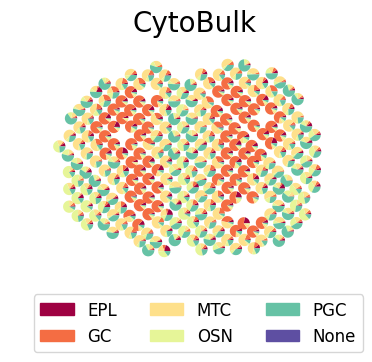

In [7]:
ct.plots.celltype_fraction_pie(adata=deconv_adata,
                                scale_facter_x=5,
                                scale_factor_y=5,
                                out_dir="C:/Users/wangxueying/project/CytoBulk/case/MOB_layer",
                                rotation_angle=225)

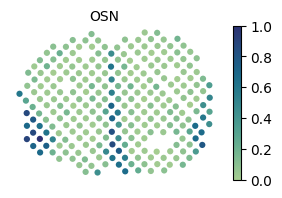

In [9]:
ct.plots.celltype_fraction_heatmap(adata=deconv_adata,
                                    label='OSN',
                                    out_dir="C:/Users/wangxueying/project/CytoBulk/case/MOB_layer",
                                    rotation_angle=225)

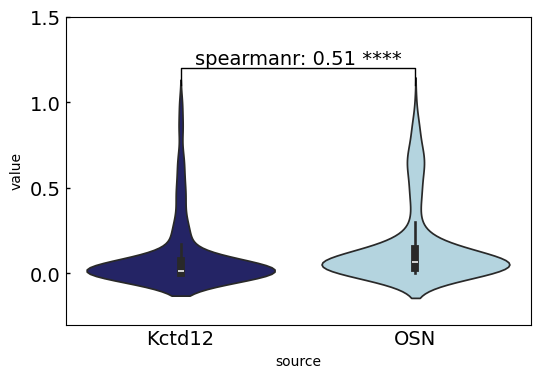

In [11]:
ct.plots.paired_violin(adata=deconv_adata,
                        label='OSN',
                        gene='Kctd12',
                        out_dir="C:/Users/wangxueying/project/CytoBulk/case/mouse_mob_1/output/output")
